In [35]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

## Visualize

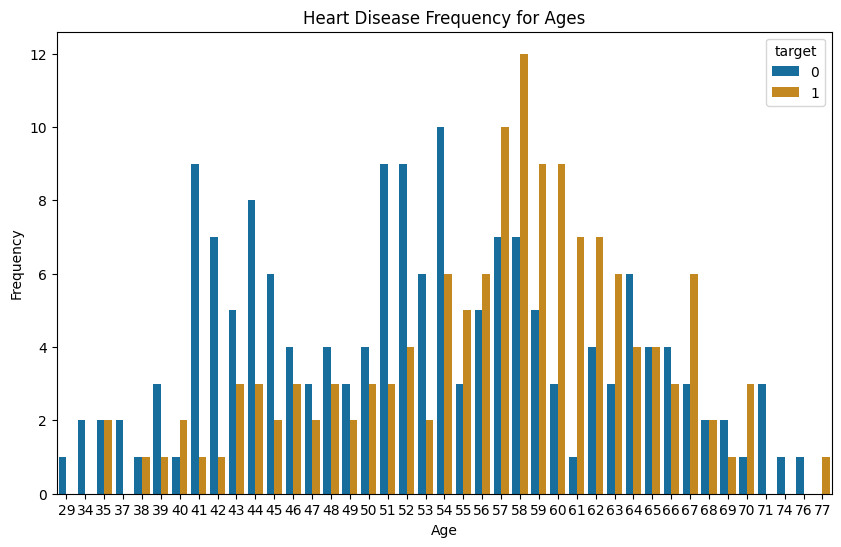

In [3]:
df = pd.read_csv('data/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1}) # 0 for healthy, 1 for sick
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='target', data=df, palette='colorblind')
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



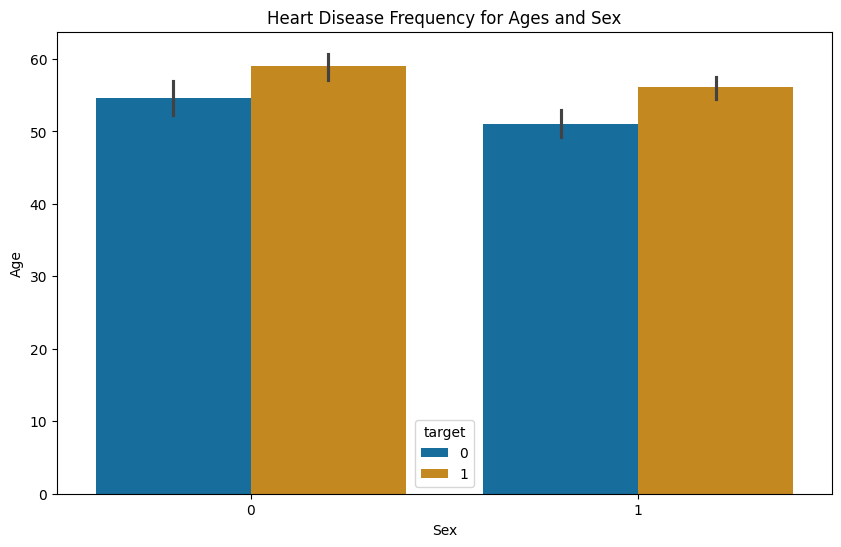

In [5]:
# barplot of age vs sex with target
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='age', hue='target', data=df, palette='colorblind')
plt.title('Heart Disease Frequency for Ages and Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

## KNN

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# knn
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, knn.predict(X_train))
cm_test = confusion_matrix(y_test, knn.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'KNN - Accuracy for train: {accuracy_for_train}')
print(f'KNN - Accuracy for test: {accuracy_for_testt}')


KNN - Accuracy for train: 0.76
KNN - Accuracy for test: 0.69


## SVM

In [15]:
# svm
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, svm.predict(X_train))
cm_test = confusion_matrix(y_test, svm.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'SVM - Accuracy for train: {accuracy_for_train}')
print(f'SVM - Accuracy for test: {accuracy_for_testt}')

SVM - Accuracy for train: 0.66
SVM - Accuracy for test: 0.67


## Naive Bayes

In [19]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, nb.predict(X_train))
cm_test = confusion_matrix(y_test, nb.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'Naive Bayes - Accuracy for train: {accuracy_for_train}')
print(f'Naive Bayes - Accuracy for test: {accuracy_for_testt}')

Naive Bayes - Accuracy for train: 0.85
Naive Bayes - Accuracy for test: 0.84


## Decision Tree

In [21]:
# decision tree
dc = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

dc.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, dc.predict(X_train))
cm_test = confusion_matrix(y_test, dc.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'Decision Tree - Accuracy for train: {accuracy_for_train}')
print(f'Decision Tree - Accuracy for test: {accuracy_for_testt}')

Decision Tree - Accuracy for train: 1.0
Decision Tree - Accuracy for test: 0.75


## Random Forest

In [24]:
# random forest
rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=42, max_depth=10, min_samples_split=2)

rf.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, rf.predict(X_train))
cm_test = confusion_matrix(y_test, rf.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'Random Forest - Accuracy for train: {accuracy_for_train}')
print(f'Random Forest - Accuracy for test: {accuracy_for_testt}')

Random Forest - Accuracy for train: 0.98
Random Forest - Accuracy for test: 0.8


## Adaboost

In [26]:
# adaboost
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

adaboost.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, adaboost.predict(X_train))
cm_test = confusion_matrix(y_test, adaboost.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'AdaBoost - Accuracy for train: {accuracy_for_train}')
print(f'AdaBoost - Accuracy for test: {accuracy_for_testt}')

AdaBoost - Accuracy for train: 0.91
AdaBoost - Accuracy for test: 0.84


c:\Users\likef\miniconda3\envs\ml-env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Gradient Boosting

In [27]:
# gradient boosting

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, subsample=1.0, min_samples_split=2)

gb.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, gb.predict(X_train))
cm_test = confusion_matrix(y_test, gb.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'Gradient Boosting - Accuracy for train: {accuracy_for_train}')
print(f'Gradient Boosting - Accuracy for test: {accuracy_for_testt}')

Gradient Boosting - Accuracy for train: 1.0
Gradient Boosting - Accuracy for test: 0.85


## XGBoost

In [29]:
# xgboost
xgb = XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=42)

xgb.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, xgb.predict(X_train))
cm_test = confusion_matrix(y_test, xgb.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'XGBoost - Accuracy for train: {accuracy_for_train}')
print(f'XGBoost - Accuracy for test: {accuracy_for_testt}')

XGBoost - Accuracy for train: 1.0
XGBoost - Accuracy for test: 0.87


## Stacking

In [34]:
# stacking
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(kernel='rbf', random_state=42)
xgb = XGBClassifier()
ad = AdaBoostClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

estimators = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('svm', svm),
    ('ad', ad),
    ('gb', gb)
]

sc = StackingClassifier(estimators=estimators, final_estimator=xgb)

sc.fit(X_train, y_train)

cm_train = confusion_matrix(y_train, sc.predict(X_train))
cm_test = confusion_matrix(y_test, sc.predict(X_test))

accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_testt = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print(f'Stacking - Accuracy for train: {accuracy_for_train}')
print(f'Stacking - Accuracy for test: {accuracy_for_testt}')

c:\Users\likef\miniconda3\envs\ml-env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\likef\miniconda3\envs\ml-env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\likef\miniconda3\envs\ml-env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\likef\miniconda3\envs\ml-env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

Stacking - Accuracy for train: 0.92
Stacking - Accuracy for test: 0.85
